This program is used to interpolate the following functions:

Runge function: 
f(x) = 1 / (1 + 25 * x^2)

Logarithmic function:
g(x) = ln(x + 2)

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import math

In [6]:
# Lagrange interpolation function
def Lagrang(X, Y, n, x):
    Sum = 0
    for i in range(n):
        top = 1
        bottom = 1
        for j in range(n):
            if(j == i):
                continue
            else:
                top *= (x - X[j])
                bottom *= (X[i] - X[j])
        Sum += Y[i] * (top / bottom)

    return Sum

In [7]:
#Newton's polynomial

def F(i, k, arrX, arrY): #recursive function for finding the divided difference of the kth order
    if(k==1):
        return (arrY[i+1] - arrY[i])/(arrX[i+1] - arrX[i])
    else:
        return (F(i+1, k-1, arrX, arrY)-F(i, k-1, arrX, arrY))/(arrX[i+k] - arrX[i])
    
def Nywton(arrX, arrY, n, x): 
    sum = arrY[0]
    mult = 1
    for k in range(n-1):
        mult *= (x - arrX[k])
        sum += F(0, k+1, arrX, arrY)*mult
    return sum

In [15]:
#function two make plots

def plot_interpolations(X, Xi, Y1, Yi1, res_1, Y2, Yi2, res_2):
    plt.figure(figsize=(12, 6))

    # First plot: Runge function interpolation
    plt.subplot(1, 2, 1)
    plt.scatter(X, Y1, color="red")
    plt.plot(Xi, Yi1, label="Runge Function (Original)", color="blue")
    plt.plot(Xi, res_1, label="Runge Interpolation", linestyle="--", color="orange")
    plt.title("Runge Function Interpolation")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)

    # Second plot: Logarithmic function interpolation
    plt.subplot(1, 2, 2)
    plt.scatter(X, Y2, color="red")
    plt.plot(Xi, Yi2, label="Logarithmic Function (Original)", color="green")
    plt.plot(Xi, res_2, label="Logarithmic Interpolation", linestyle="--", color="red")
    plt.title("Logarithmic Function Interpolation")
    plt.xlabel("x")
    plt.ylabel("g(x)")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [16]:
# Data for ploting each function

Number_of_interpolation_points = 7 #Number of interpolation points
x_plot_points = np.linspace(-1,1,100)
X_values_in_interpolation_points = np.linspace(-1,1,Number_of_interpolation_points)
X_values_using_Chebyshev_knots = [math.cos((2*k-1)/(2*Number_of_interpolation_points)*math.pi) for k in range(1, Number_of_interpolation_points+1)]

In [19]:
Y_values_in_interpolation_points = [1/(1 + 25*i*i) for i in X_values_in_interpolation_points]
Y_values_for_all_plot = [1/(1 + 25*i*i) for i in x_plot_points]
Y_values_for_interpolation_fucntion = [Lagrang(X_values_in_interpolation_points, Y_values_in_interpolation_points, Number_of_interpolation_points, i) for i in x_plot_points]


Y2 = [math.log(i + 2) for i in X_values_in_interpolation_points]
Yi2 = [math.log(i + 2) for i in x_plot_points]
res_2 = [Lagrang(X_values_in_interpolation_points,Y2,Number_of_interpolation_points,i) for i in x_plot_points]

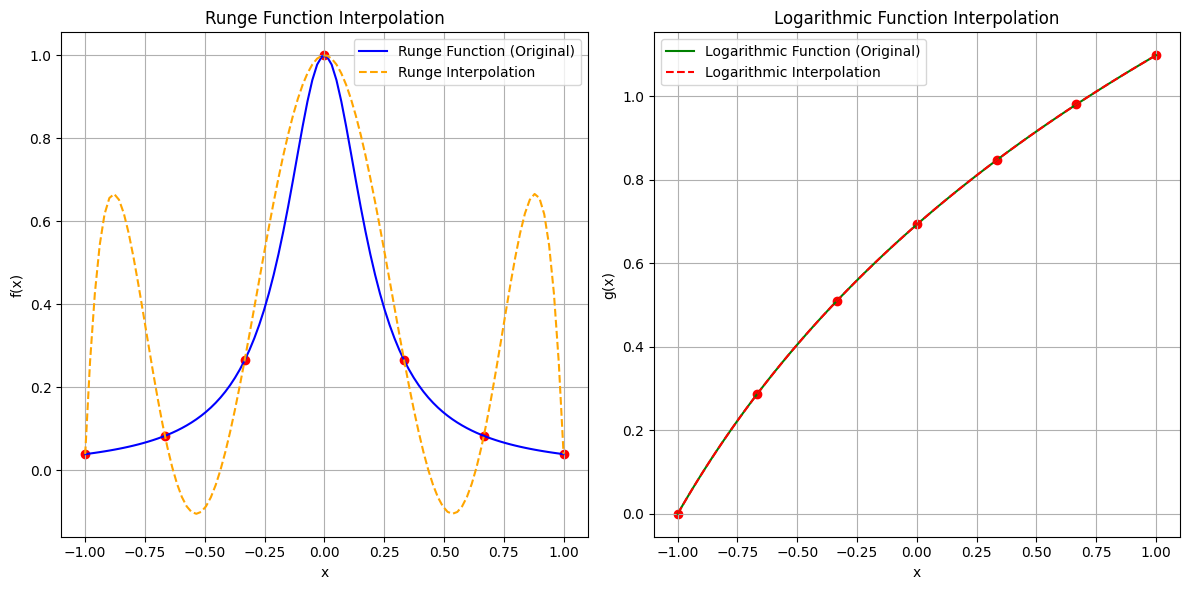

In [20]:
plot_interpolations(X_values_in_interpolation_points, x_plot_points, Y_values_in_interpolation_points, Y_values_for_all_plot, Y_values_for_interpolation_fucntion, Y2, Yi2, res_2)

Now lets interpolate this function using Chebyshev knots

In [21]:
Y_ch_1 = [1/(1 + 25*i*i) for i in X_values_using_Chebyshev_knots]
res_ch_1 = [Lagrang(X_values_using_Chebyshev_knots, Y_ch_1, Number_of_interpolation_points, i) for i in x_plot_points]

Y_ch_2 = [math.log(i + 2) for i in X_values_using_Chebyshev_knots]
res_ch_2 = [Lagrang(X_values_using_Chebyshev_knots, Y_ch_2, Number_of_interpolation_points, i) for i in x_plot_points]

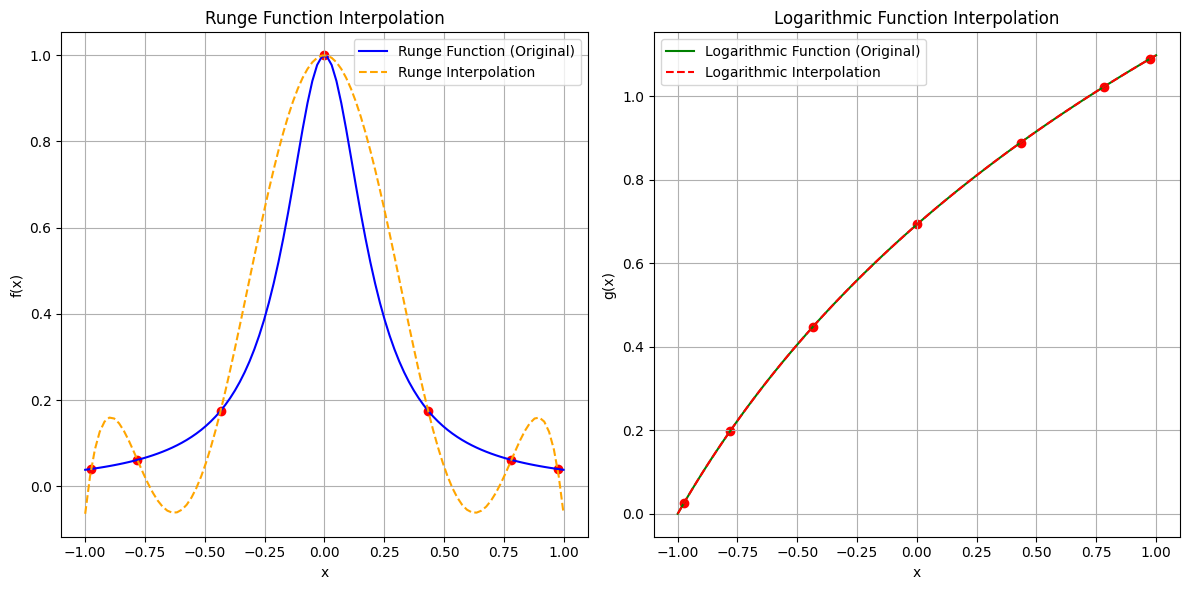

In [32]:
plot_interpolations(X_values_using_Chebyshev_knots, x_plot_points, Y_ch_1, Y_values_for_all_plot, res_ch_1, Y_ch_2, Yi2, res_ch_2)

Let's use Newton Polynomial

In [33]:
Y_values_in_interpolation_points = [1/(1 + 25*i*i) for i in X_values_in_interpolation_points]
Y_values_for_all_plot = [1/(1 + 25*i*i) for i in x_plot_points]
Y_values_for_interpolation_fucntion = [Nywton(X_values_in_interpolation_points, Y_values_in_interpolation_points, Number_of_interpolation_points, i) for i in x_plot_points]



Y2 = [math.log(i + 2) for i in X_values_in_interpolation_points]
Yi2 = [math.log(i + 2) for i in x_plot_points]
res2 = [Nywton(X_values_in_interpolation_points,Y2,Number_of_interpolation_points,i) for i in x_plot_points]

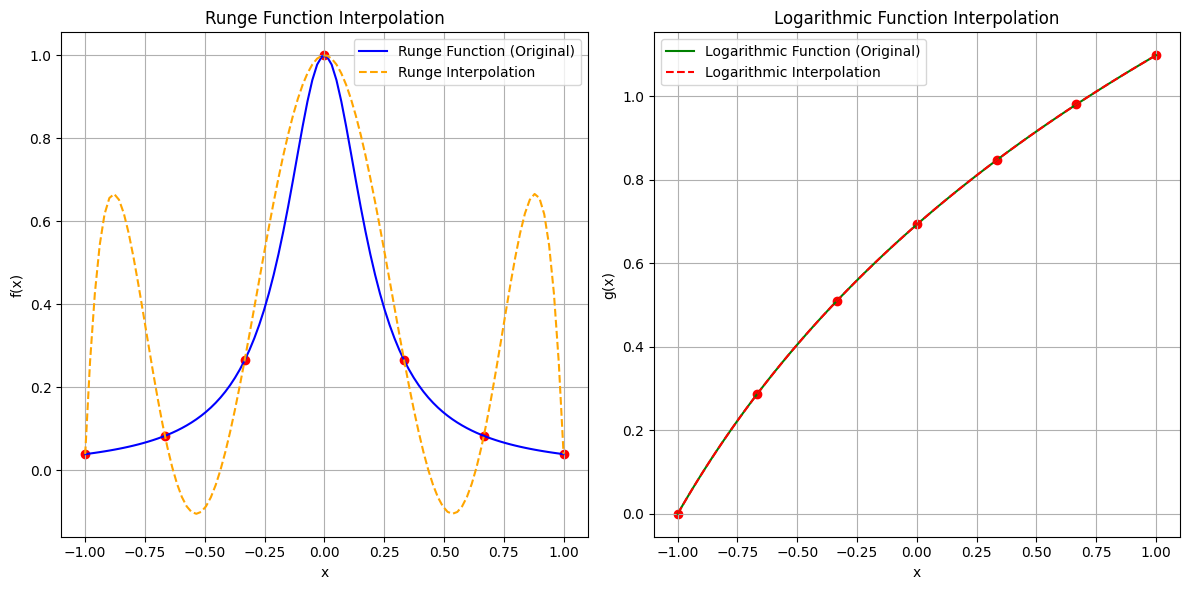

In [34]:
plot_interpolations(X_values_in_interpolation_points, x_plot_points, Y_values_in_interpolation_points, Y_values_for_all_plot, Y_values_for_interpolation_fucntion, Y2, Yi2, res_2)

In [35]:
Y_ch_1 = [1/(1 + 25*i*i) for i in X_values_using_Chebyshev_knots]
res_ch_1 = [Nywton(X_values_using_Chebyshev_knots, Y_ch_1, Number_of_interpolation_points, i) for i in x_plot_points]

Y_ch_2 = [math.log(i + 2) for i in X_values_using_Chebyshev_knots]
res_ch_2 = [Nywton(X_values_using_Chebyshev_knots, Y_ch_2, Number_of_interpolation_points, i) for i in x_plot_points]

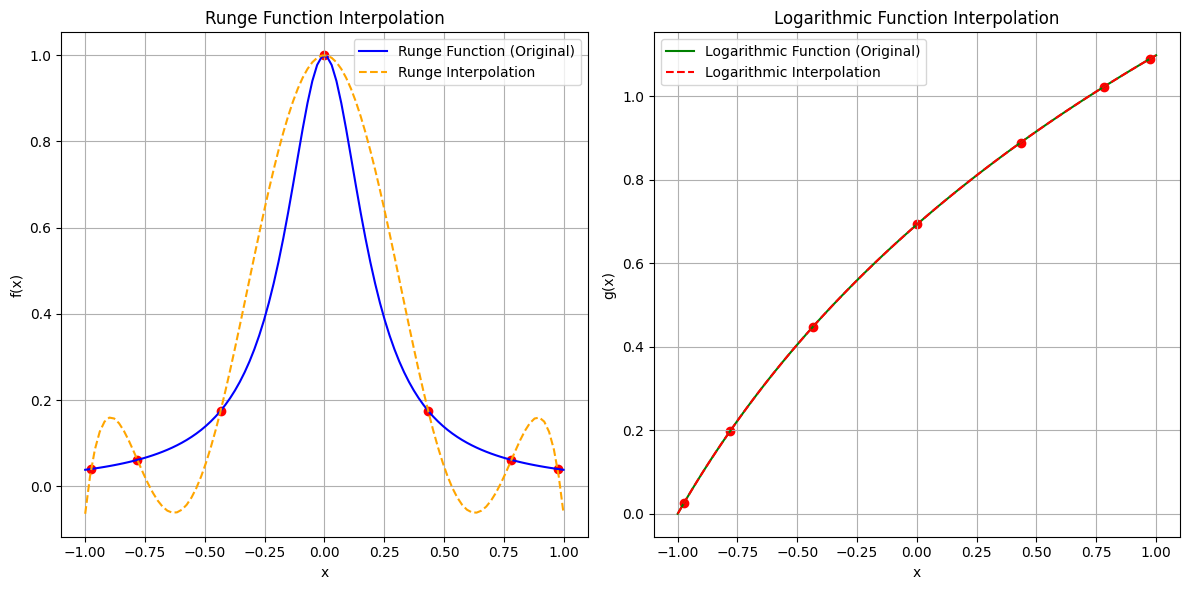

In [36]:
plot_interpolations(X_values_using_Chebyshev_knots, x_plot_points, Y_ch_1, Y_values_for_all_plot, res_ch_1, Y_ch_2, Yi2, res_ch_2)